# Group Project ML: Dijkstra

## Adult income dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, etc.

### DATA

**Categorical Attributes:**
- workclass: Individual work category ( e.g. Private, Local-gov )
- education: The highest education degree for the person
- marital-status: Individual marital status
- occupation: Individual's occupation (e.g. Machine-op-inspct, Farming-fishing)
- relationship: Individual's relation in a family ( e.g. Husband, Wife )
- race: Race of Individual (e.g. White, Black, Asian-Pac-Islander )
- sex: Female, Male
- native-country: Individual's country of origin

**Continuous Attributes:**
- age: Age of an individual
- education-num: Individual's years of receiving education
- fnlwgt: final weight (In other words, this is the number of people the census believes the entry represents.)
- capital-gain
- capital-loss
- hours-per-week: Individual's working hours per week




### Getting the raw data

In [37]:
import pandas as pd
df=pd.read_csv('adult.csv') #Read raw data

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

In [40]:
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

### Understanding data types

In [41]:
df.info() #see data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [42]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [43]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Redefining Column Names

In [44]:
df.columns=["age","workclass","fnlwgt","educational level","years of studying","marital status","occupation","relationship","race","gender","capital_gain","capital_loss","working hours per week","country of origin","income"]
df

,age,workclass,fnlwgt,educational level,years of studying,marital status,occupation,relationship,race,gender,capital_gain,capital_loss,working hours per week,country of origin,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Replace Values

In [45]:
#Replace  values
df['income'] = df['income'].replace({'>50K': 1, '<=50K': 0})
df['workclass'] = df['workclass'].replace({'?': 'Unknown'})
df['occupation'] = df['occupation'].replace({'?': 'Unknown'})

### Checking all unique values inside every column to make sure the data is clean

In [46]:
column_names = []
column_names = df.columns

for v in column_names:
    a = df[v].unique()
    print(a)


[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' 'Unknown' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Unknown'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Hu

In [47]:
column_names

Index(['age', 'workclass', 'fnlwgt', 'educational level', 'years of studying',
       'marital status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'working hours per week',
       'country of origin', 'income'],
      dtype='object')

### Get statistics for the numerical values

In [48]:
numerical_values=["age","years of studying","working hours per week"]
statistics_for_numerical=df[numerical_values].describe()
statistics_for_numerical

,age,years of studying,working hours per week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382
std,13.710510,2.570973,12.391444
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [49]:
num_cols_fixed = df.select_dtypes(include=np.number).columns
num_cols_fixed

Index(['age', 'fnlwgt', 'years of studying', 'capital_gain', 'capital_loss',
       'working hours per week', 'income'],
      dtype='object')

### Understanding how our data is distributed

In [50]:
df

,age,workclass,fnlwgt,educational level,years of studying,marital status,occupation,relationship,race,gender,capital_gain,capital_loss,working hours per week,country of origin,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


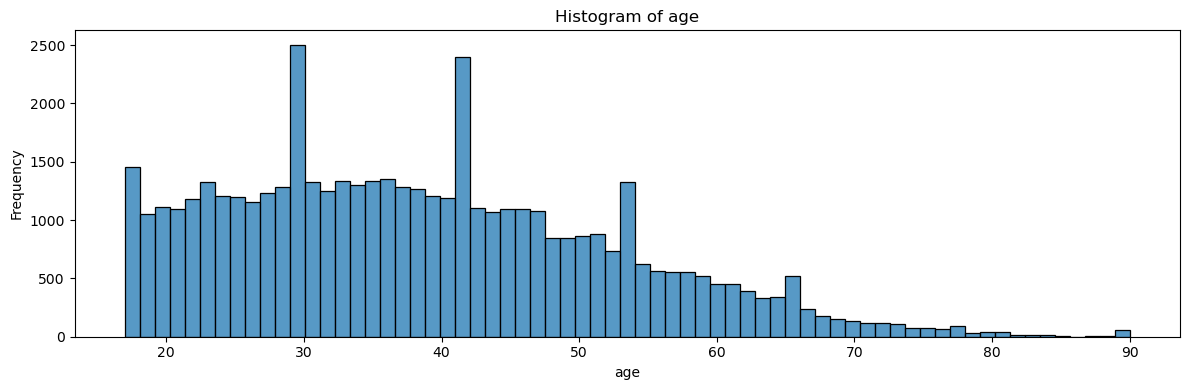

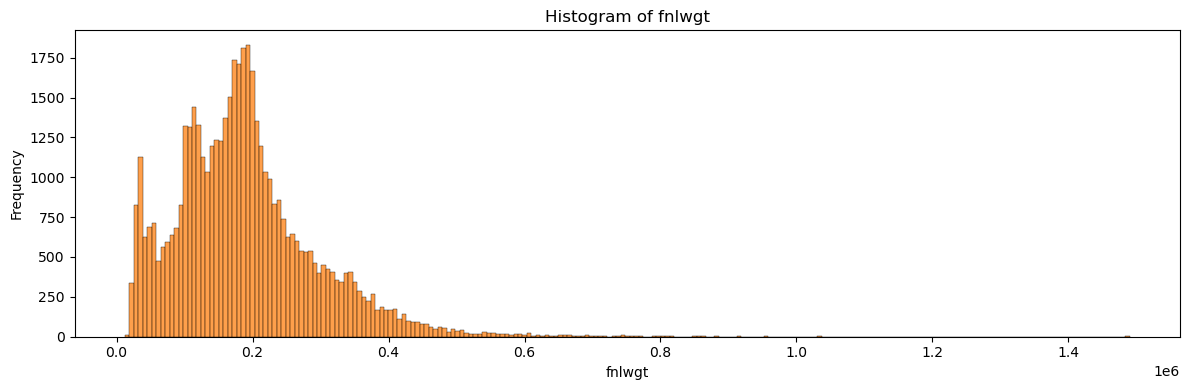

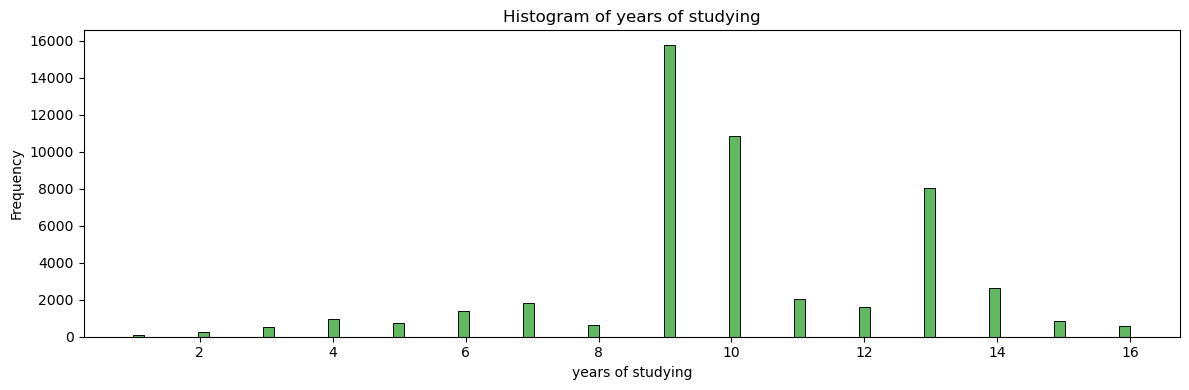

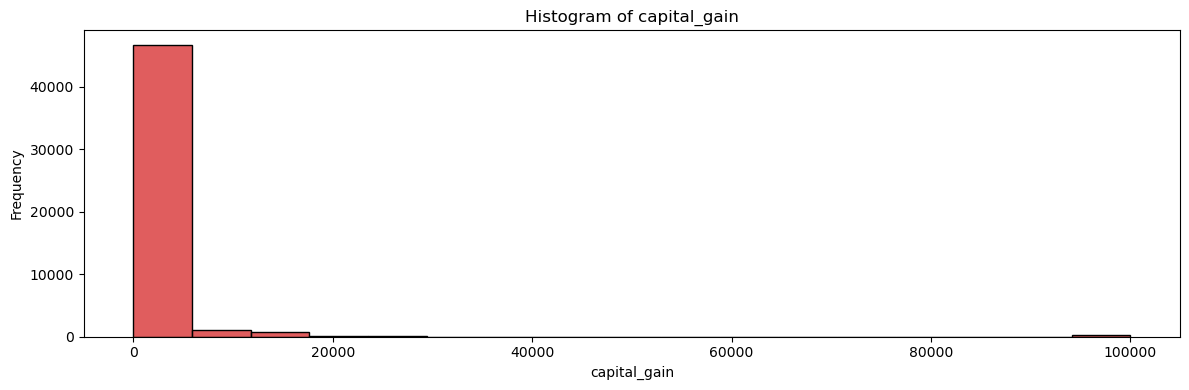

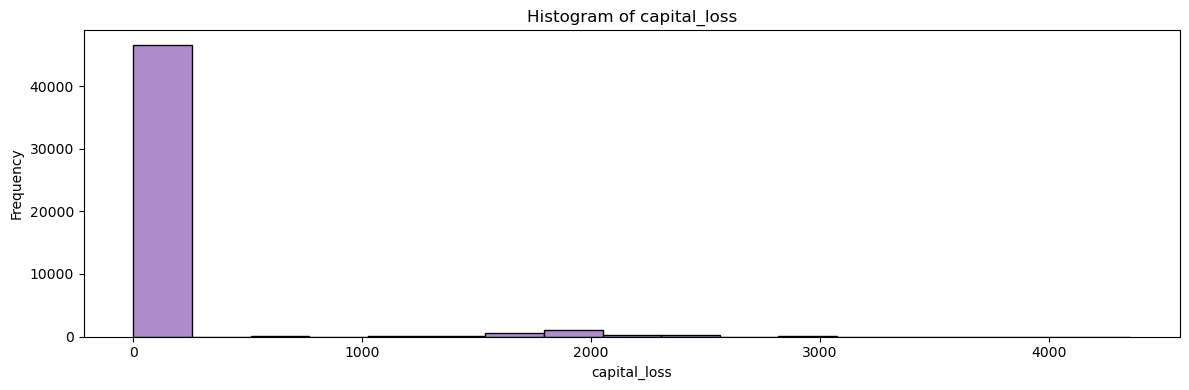

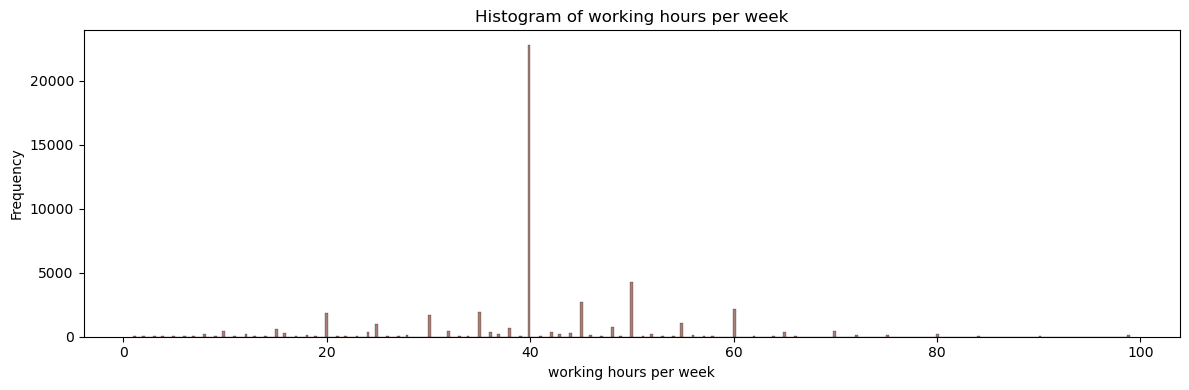

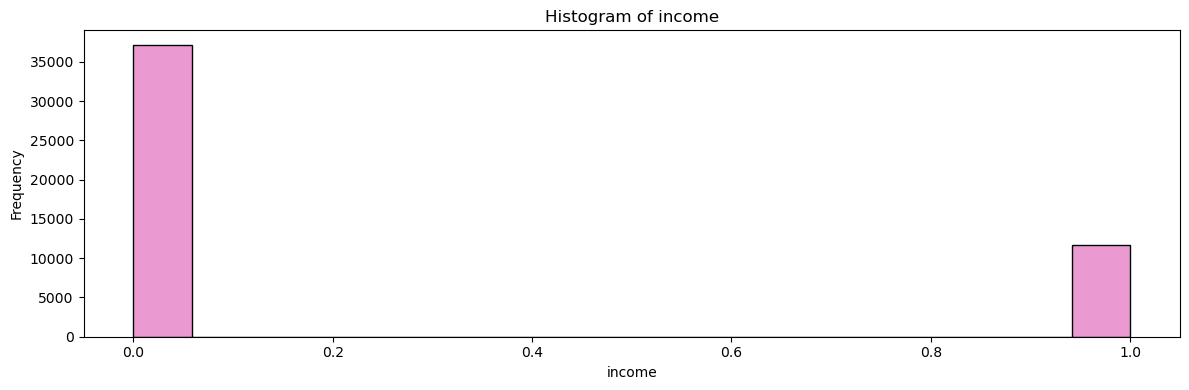

In [51]:
for i, col in enumerate(num_cols_fixed):
    plt.figure(figsize=(12, 4))  # Adjust the figure size if needed
    sns.histplot(df[col], color=sns.color_palette()[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [52]:
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

### Plot columns histograms, grouping by target variable (income)

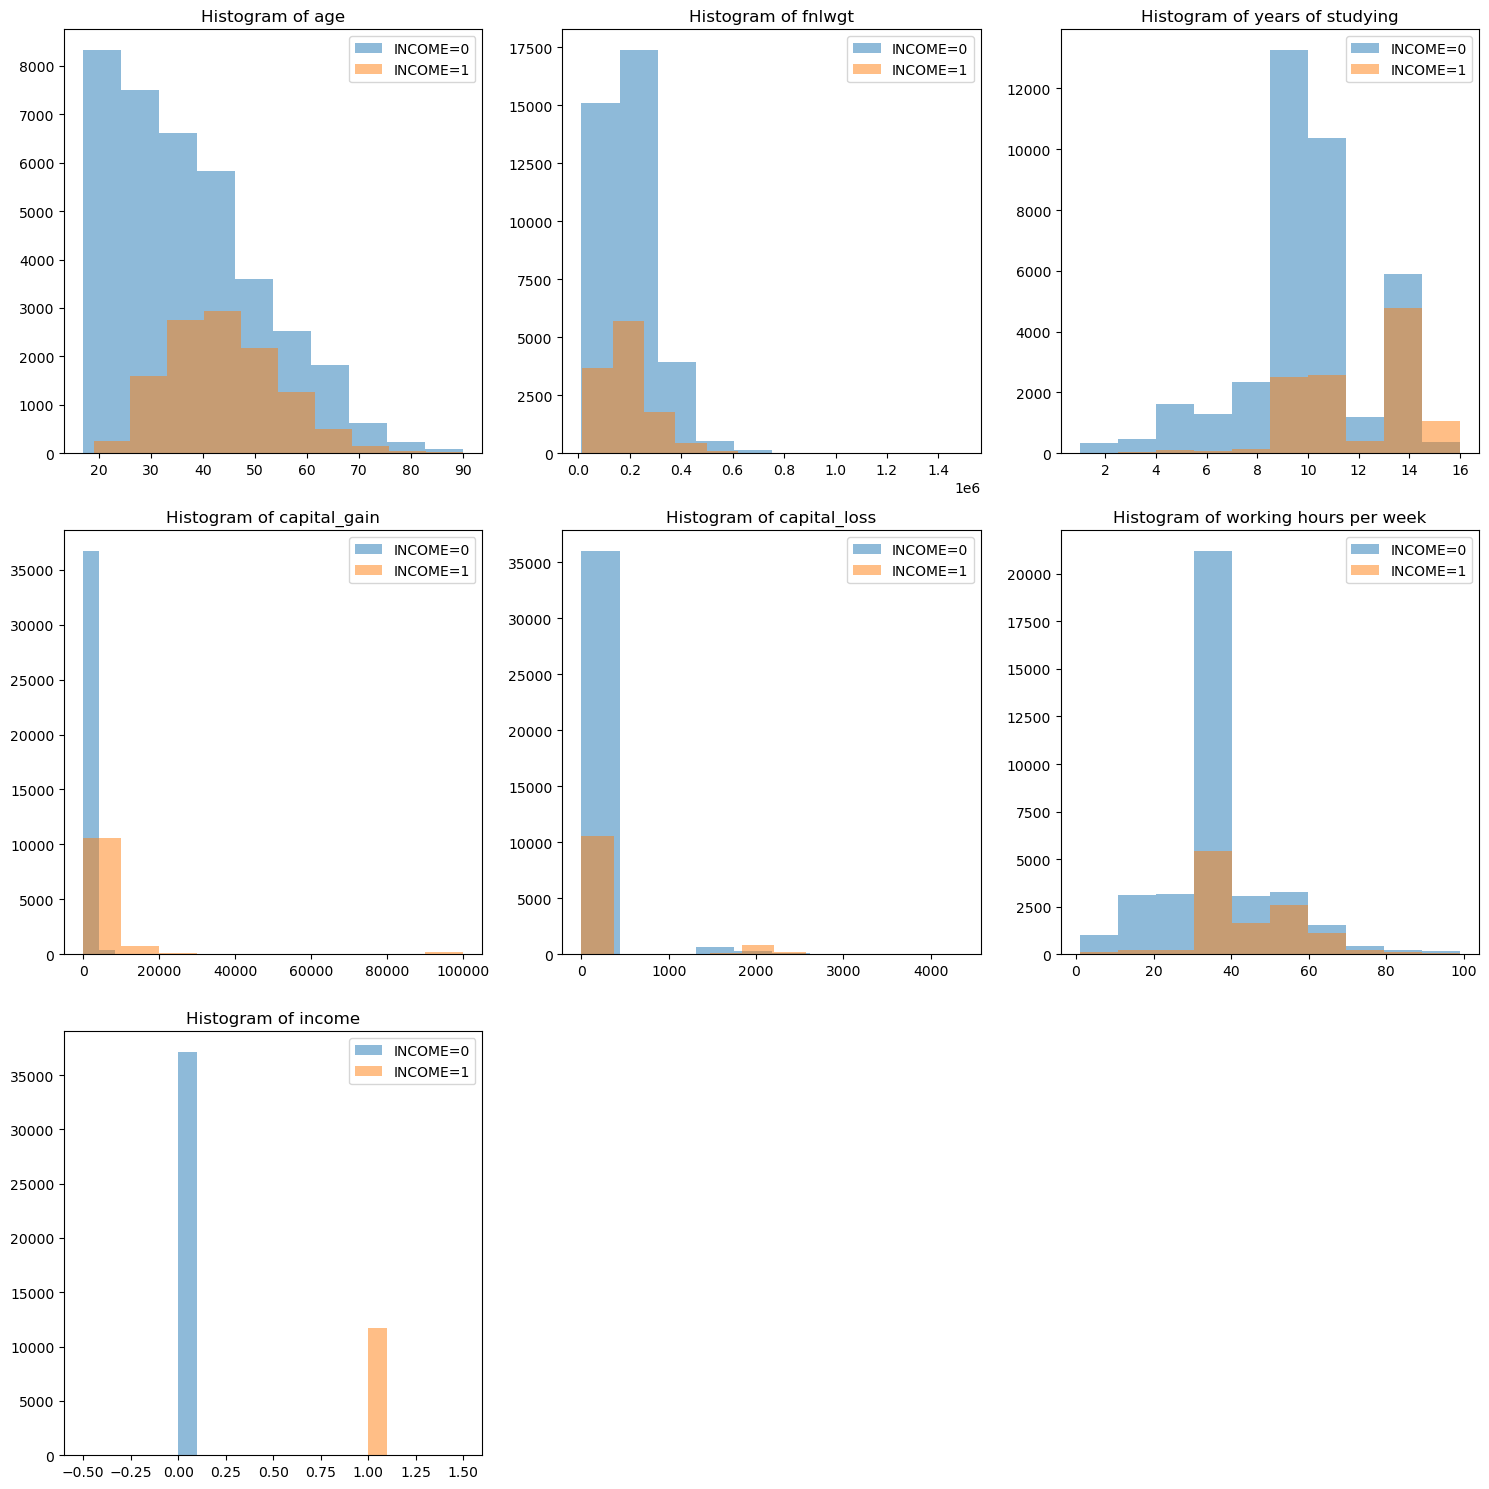

In [53]:
grouped = df.groupby('income')

#Get the list of numerical features
numerical_features = df.select_dtypes(exclude=['O']).columns

#Calculate the number of rows and columns for the subplots
n = len(numerical_features)
ncols = 3 #Height -> y axis
nrows = n // ncols if n % ncols == 0 else n // ncols + 1 #X axis

#Create a new figure for the subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

#Flatten the axes array
axs = axs.flatten()

#Iterate over each numerical feature
for i, feature in enumerate(numerical_features):  # Iterate over each group and plot the histogram on the corresponding subplot

    # Add a title and a legend to each subplot
    axs[i].set_title(f'Histogram of {feature}')
    for name, group in grouped:
        axs[i].hist(group[feature], alpha=0.5, label=f'INCOME={name}')
    axs[i].legend()

#Remove extra subplots
for i in range(n, nrows*ncols):
        fig.delaxes(axs[i])

#Display the plot
plt.tight_layout()
plt.show()


In [54]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'educational level', 'years of studying',
       'marital status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'working hours per week',
       'country of origin', 'income'],
      dtype='object')

In [55]:
#Getting dummy variables

df = pd.concat([df.drop("occupation", axis=1), pd.get_dummies(df.occupation).add_prefix("occupation_")], axis=1)
df = pd.concat([df.drop("workclass", axis=1), pd.get_dummies(df.workclass).add_prefix("workclass_")], axis=1)
df = pd.concat([df.drop('educational level', axis=1), pd.get_dummies(df['educational level']).add_prefix('educational level_')], axis=1)
df = pd.concat([df.drop('marital status', axis=1), pd.get_dummies(df['marital status']).add_prefix('marital status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('country of origin', axis=1), pd.get_dummies(df['country of origin']).add_prefix('country of origin_')], axis=1)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
#df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [56]:
#df = pd.concat([df.drop('educational level', axis=1), pd.get_dummies(df['educational level']).add_prefix('educational level_')], axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to country of origin_Yugoslavia
dtypes: int64(8), uint8(100)
memory usage: 7.6 MB


In [58]:
#Searching for null values after adding dummies

for column in df.columns:
    print(f"Column: {column}")
    print(f"Data type: {df[column].dtype}")
    print(f"Number of non-null values: {df[column].count()}")
    print(f"Number of unique values: {df[column].nunique()}")
    if df[column].dtype == 'object':
        print(f"Unique values: {df[column].unique()}")
    print("\n")

Column: age
Data type: int64
Number of non-null values: 48842
Number of unique values: 74


Column: fnlwgt
Data type: int64
Number of non-null values: 48842
Number of unique values: 28523


Column: years of studying
Data type: int64
Number of non-null values: 48842
Number of unique values: 16


Column: gender
Data type: int64
Number of non-null values: 48842
Number of unique values: 2


Column: capital_gain
Data type: int64
Number of non-null values: 48842
Number of unique values: 123


Column: capital_loss
Data type: int64
Number of non-null values: 48842
Number of unique values: 99


Column: working hours per week
Data type: int64
Number of non-null values: 48842
Number of unique values: 96


Column: income
Data type: int64
Number of non-null values: 48842
Number of unique values: 2


Column: occupation_Adm-clerical
Data type: uint8
Number of non-null values: 48842
Number of unique values: 2


Column: occupation_Armed-Forces
Data type: uint8
Number of non-null values: 48842
Number of

## Correlation matrix

In [59]:
sort_correlations =(df.corr()['income'].abs()).sort_values()
num_drop = int(0.7 * len(df.columns)) 
droped_columns = sort_correlations.iloc[:num_drop].index
df_droped = df.drop(droped_columns , axis =1)
df_droped

,age,years of studying,gender,capital_gain,capital_loss,working hours per week,income,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Handlers-cleaners,...,marital status_Married-civ-spouse,marital status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_White
0,25,7,1,0,0,40,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,38,9,1,0,0,50,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,28,12,1,0,0,40,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,44,10,1,7688,0,40,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,18,10,0,0,0,30,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
48838,40,9,1,0,0,40,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
48839,58,9,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
48840,22,9,1,0,0,20,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [60]:
df

,age,fnlwgt,years of studying,gender,capital_gain,capital_loss,working hours per week,income,occupation_Adm-clerical,occupation_Armed-Forces,...,country of origin_Portugal,country of origin_Puerto-Rico,country of origin_Scotland,country of origin_South,country of origin_Taiwan,country of origin_Thailand,country of origin_Trinadad&Tobago,country of origin_United-States,country of origin_Vietnam,country of origin_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
df['income'].isnull().sum()

0

In [65]:
df['age'].corr(df['income'])

0.23036946784751375

In [66]:
df.corr()['income']

age                                  0.230369
fnlwgt                              -0.006339
years of studying                    0.332613
gender                               0.214628
capital_gain                         0.223013
                                       ...   
country of origin_Thailand          -0.004219
country of origin_Trinadad&Tobago   -0.009107
country of origin_United-States      0.032551
country of origin_Vietnam           -0.015542
country of origin_Yugoslavia         0.005522
Name: income, Length: 108, dtype: float64

In [67]:
#Correlation fnlwgt

In [68]:
sort_correlations

country of origin_Cuba                  0.000885
country of origin_Hong                  0.001591
country of origin_Holand-Netherlands    0.002538
country of origin_Hungary               0.003538
country of origin_Ireland               0.003744
                                          ...   
marital status_Never-married            0.318782
years of studying                       0.332613
relationship_Husband                    0.403791
marital status_Married-civ-spouse       0.445853
income                                  1.000000
Name: income, Length: 108, dtype: float64

In [69]:
df_droped.columns

Index(['age', 'years of studying', 'gender', 'capital_gain', 'capital_loss',
       'working hours per week', 'income', 'occupation_Adm-clerical',
       'occupation_Exec-managerial', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Unknown', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Unknown', 'educational level_11th',
       'educational level_Bachelors', 'educational level_Doctorate',
       'educational level_HS-grad', 'educational level_Masters',
       'educational level_Prof-school', 'marital status_Divorced',
       'marital status_Married-civ-spouse', 'marital status_Never-married',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_Black',
       'race_White'],
      dtype='object')

<Axes: >

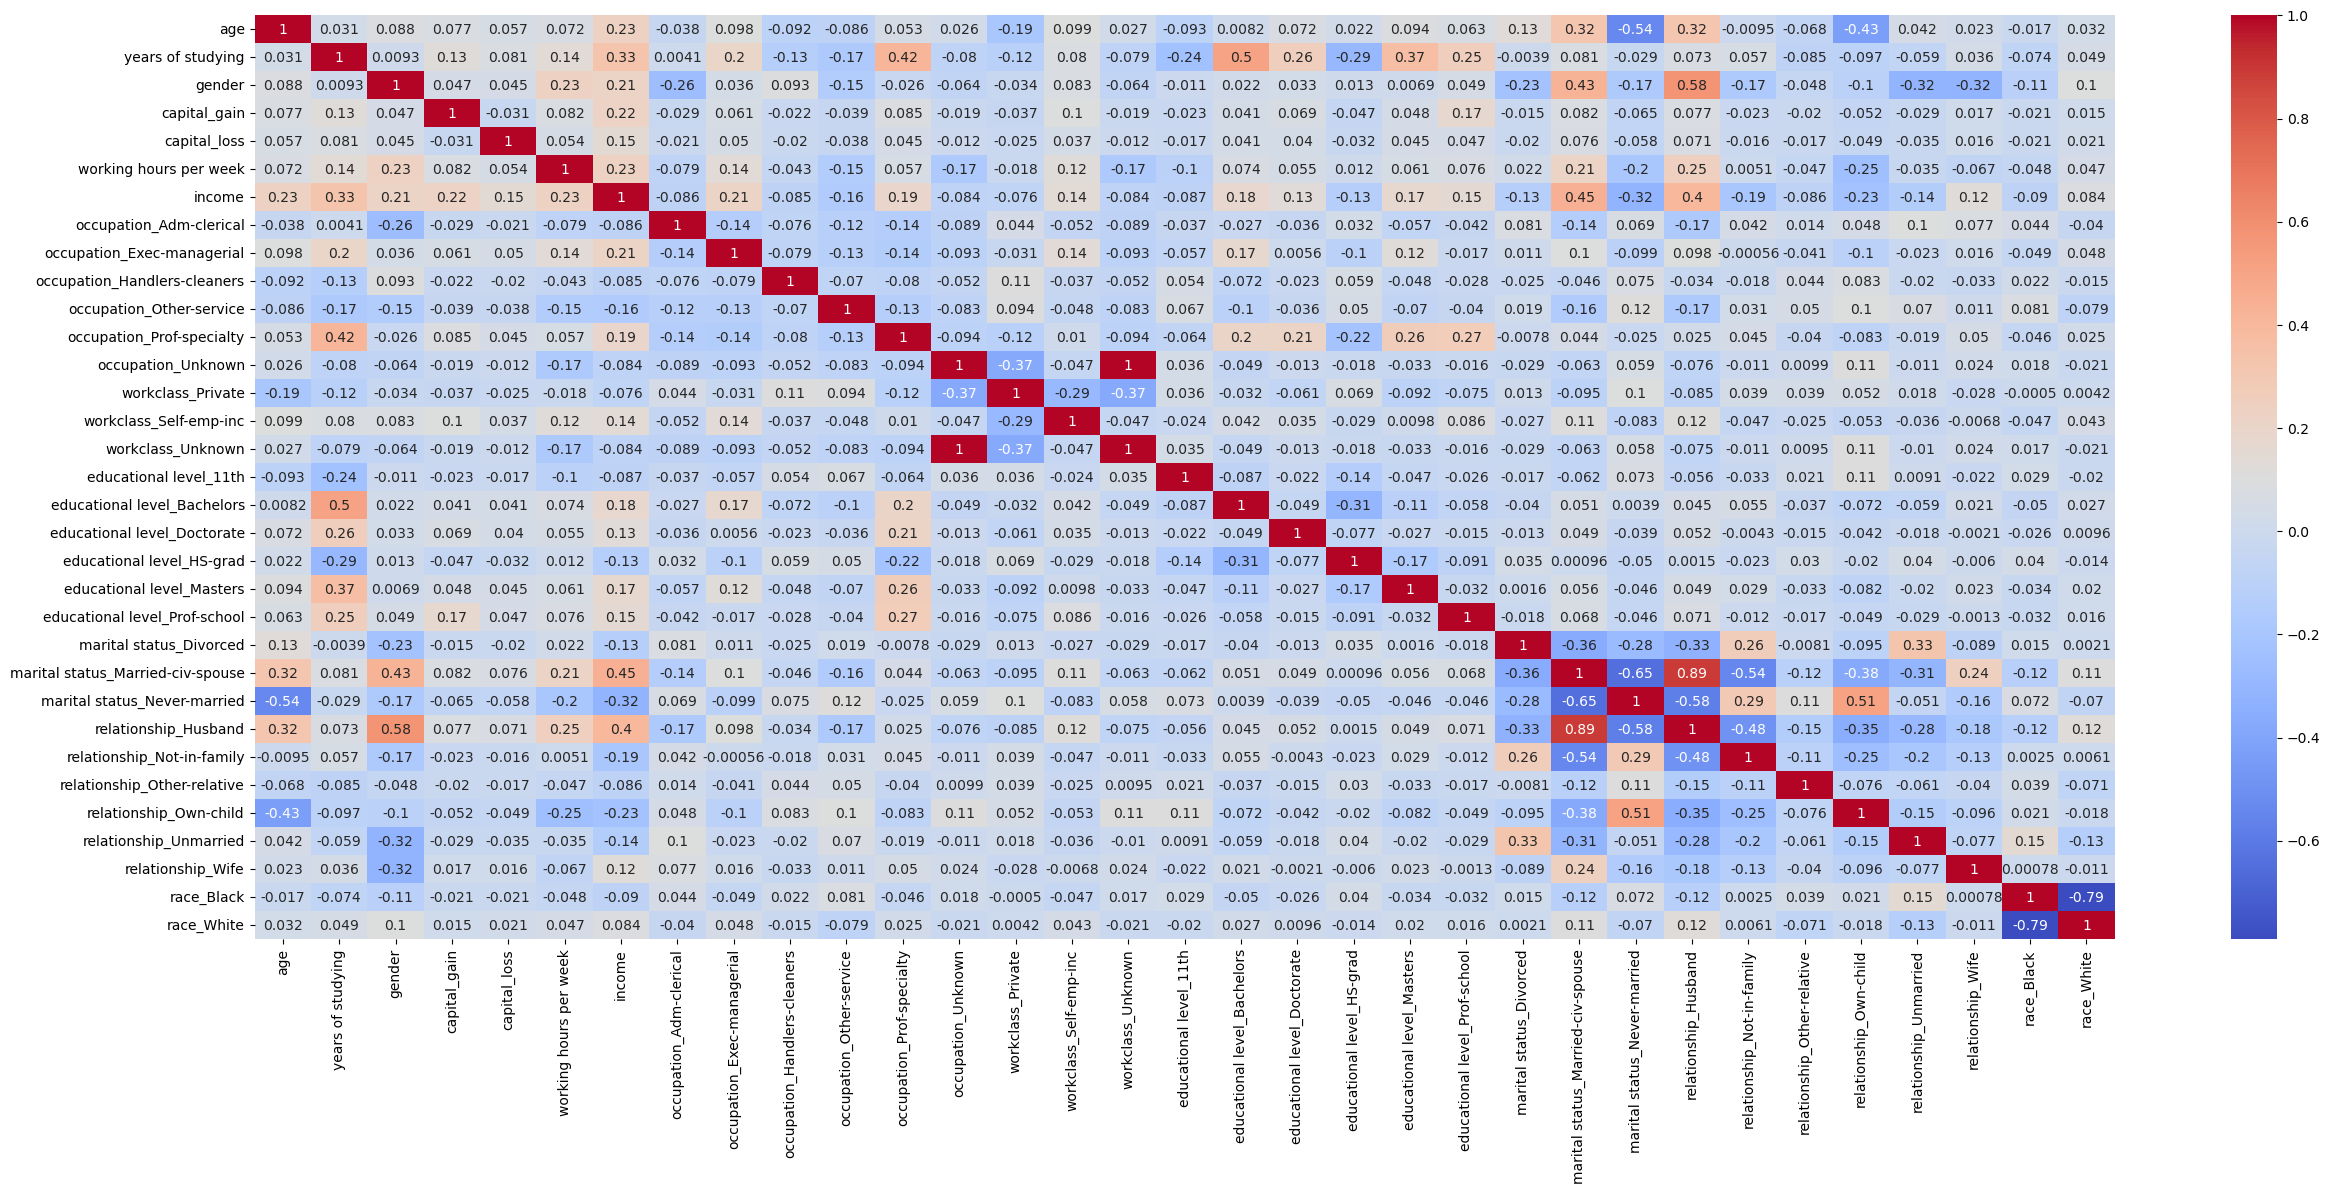

In [70]:
plt.figure(figsize = (30,12))
sns.heatmap(df_droped.corr() , cmap='coolwarm',annot = True)

NOTE: We don't have any white rows in the data set. That means that the features don't have a zero value correlation with income

### Plot correlation matrix to understand the relationship between numerical variables

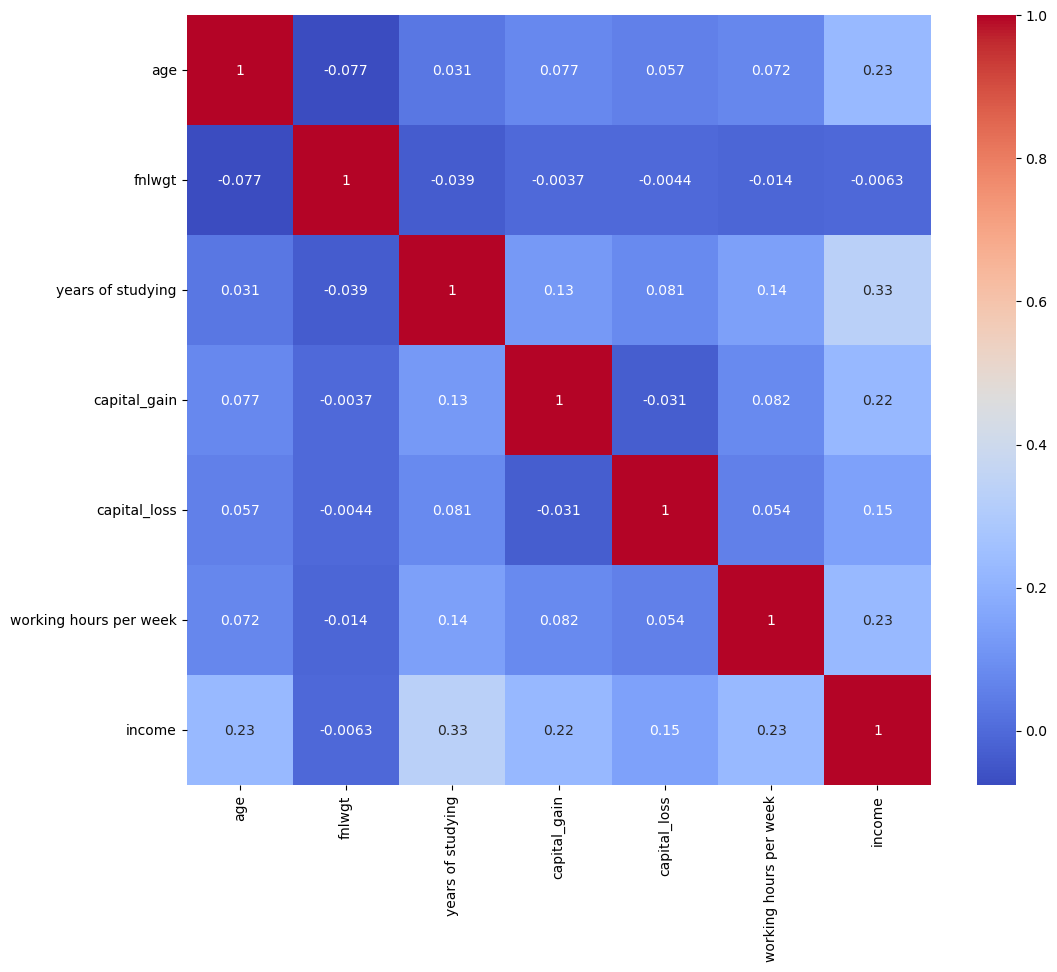

In [71]:
corr = df[num_cols_fixed].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Drop columns we won't use

In [72]:
#DROP COLUMNS
#df.drop('capital-loss',inplace=True,axis=1)
#df.drop('capital-gain',inplace=True,axis=1)
df.drop('fnlwgt',inplace=True,axis=1) 

In [73]:
df.head(10)

,age,years of studying,gender,capital_gain,capital_loss,working hours per week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,country of origin_Portugal,country of origin_Puerto-Rico,country of origin_Scotland,country of origin_South,country of origin_Taiwan,country of origin_Thailand,country of origin_Trinadad&Tobago,country of origin_United-States,country of origin_Vietnam,country of origin_Yugoslavia
0,25,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,1,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,29,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,63,15,1,3103,0,32,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,24,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,55,4,1,0,0,10,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Saving the clean data to a new csv file

In [74]:
df.to_csv('cleaned_data_set.csv',index=False)

Reading the new generated csv

In [76]:
df=pd.read_csv('cleaned_data_set.csv')
df

,age,years of studying,gender,capital_gain,capital_loss,working hours per week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,country of origin_Portugal,country of origin_Puerto-Rico,country of origin_Scotland,country of origin_South,country of origin_Taiwan,country of origin_Thailand,country of origin_Trinadad&Tobago,country of origin_United-States,country of origin_Vietnam,country of origin_Yugoslavia
0,25,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,1,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Checking the data for Income

In [77]:
records = df.shape[0]
records_above50 =df[df['income']== 1].shape[0]
records_below50 =df[df['income'] == 0].shape[0]
percentage_above50 = (records_above50/records)*100
percentage_below50 = 100 - percentage_above50
print(f"Total records: {records}")
print(f"Income above 50K: {records_above50}")
print(f"Income below 50K:{records_below50}")
print(f"Percentage of people above 50K: {percentage_above50}")
print(f"Percentage of people below 50K: {percentage_below50}")

Total records: 48842
Income above 50K: 11687
Income below 50K:37155
Percentage of people above 50K: 23.928176569346054
Percentage of people below 50K: 76.07182343065395


**Using Random Forest Clasifier**

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
df1=df.drop('income', axis=1)

In [80]:
X = df1
y = df['income']

- X_train: The training set of features
- X_test: The testing set of features
- y_train: The training set of target values
- y_test: The testing set of target values
- n_estimators: 100 (number of trees in the forest)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

We used Grid Search Technique for Hyperparameter Tuning of Model

In [82]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

Extracting Best Hyperparameters which will be used for RandomForestClassifier

In [96]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


- A new instance of the RandomForestClassifier is created 
- The RandomForestClassifier is trained on the training data X_train, y_train
- The trained model is used to predict the target variable on the testing set X_test

In [97]:
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [99]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8713276691575391

Confusion Matrix:
[[7062  417]
 [ 840 1450]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7479
           1       0.78      0.63      0.70      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



**Measuring classification performance**

Confusion matrix and ROC analysis for Random Forest Model

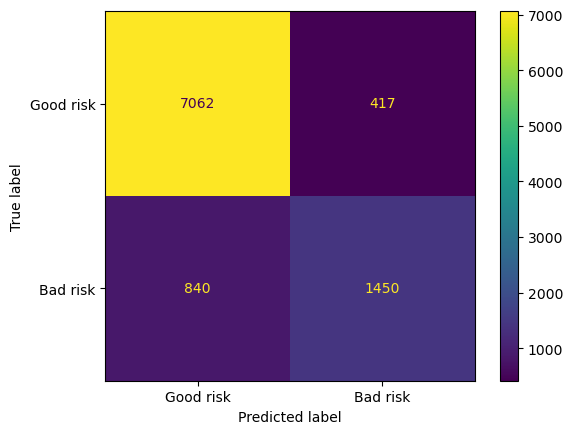

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test,    
                                        y_pred,  
                                        display_labels=['Good risk', 'Bad risk'])
plt.show()

In [101]:
cmat = confusion_matrix(y_test, y_pred)
print(cmat)

[[7062  417]
 [ 840 1450]]


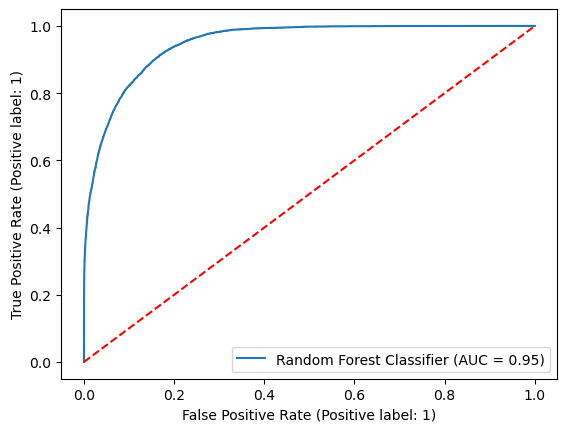

In [104]:
from sklearn.metrics import RocCurveDisplay
prob_pred = best_rf_model.predict_proba(X)[:,1]
RocCurveDisplay.from_predictions(y,  
                                 prob_pred, 
                                 name='Random Forest Classifier',  
                                 pos_label=1)
plt.plot([0, 1], [0, 1], "r--")  
plt.show()

**Logistic Regression**

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [106]:
df1=df.drop('income', axis=1)

In [107]:
X = df1
y = df['income']

- The dataset is split into training and testing sets  80% for training X_train, y_train and 20% for testing
- A Logistic Regression model is instantiated with a maximum of 10,000 iterations
- Model Training and Prediction

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [110]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8562800696079435
Confusion Matrix:
[[6987  492]
 [ 912 1378]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7479
           1       0.74      0.60      0.66      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



Random Forest Classifier gave the accuracy of 87% while Logistics Regression gave the accuracy of 86%

**Measuring classification performance**

Confusion matrix and ROC analysis for Logistics Regression

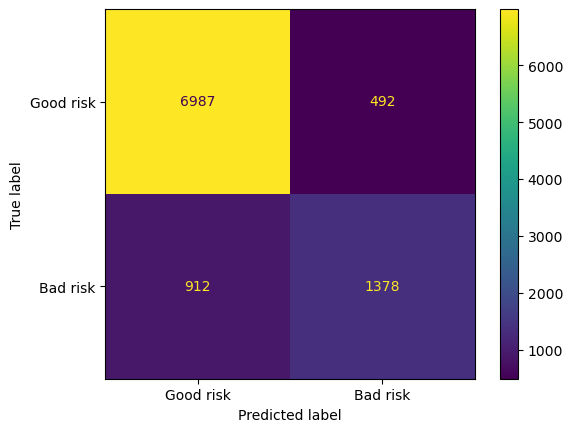

In [111]:
import matplotlib.pyplot as plt


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred,
                                        display_labels=['Good risk', 'Bad risk'])
plt.show()

In [112]:
cmat = confusion_matrix(y_test, y_pred)
print(cmat)

[[6987  492]
 [ 912 1378]]


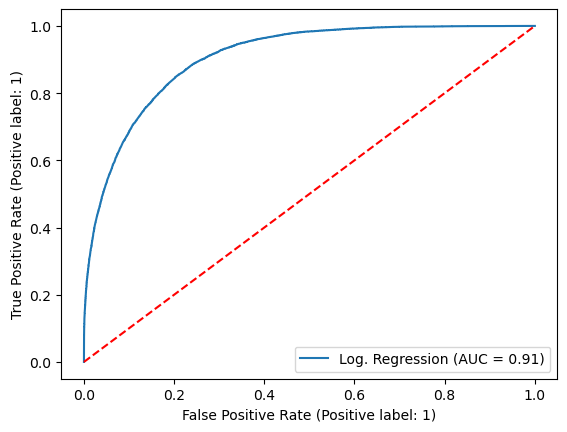

In [113]:
from sklearn.metrics import RocCurveDisplay
prob_pred = model.predict_proba(X)[:,1]
RocCurveDisplay.from_predictions(y,  
                                 prob_pred, 
                                 name='Log. Regression',  
                                 pos_label=1)
plt.plot([0, 1], [0, 1], "r--")  
plt.show()